## Import libraries

In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import scipy
from scipy.spatial.distance import pdist, squareform
from pacBayesianDendogramCut import DendrogramCut
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
temp = scipy.io.loadmat('../../multilink/data/ticktoe.mat')
X = temp["X"].tolist()                                 # X = temp.X;
G = temp["G"]    

In [3]:
X = zip(X[0],X[1])
X = list(X)
X = list(map( lambda x: [x[0], x[1]]  ,X))
X = np.asarray(X)

## Generate dataset for clustering

In [4]:
centers = np.asarray([[-6.8, -7.3], [5, 2.5], [5, -2.5]])
samples = np.asarray([4, 1, 1]) * 50

'''X2, Z, C = sklearn.datasets.make_blobs(
    samples,
    cluster_std=[2, 1, 1],
    centers=centers,
    return_centers=True)'''
dist = pdist(X)
dist = squareform(dist)

## Plot the generated dataset

C:\Users\allem\AppData\Local\Temp/ipykernel_19880/1025274349.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


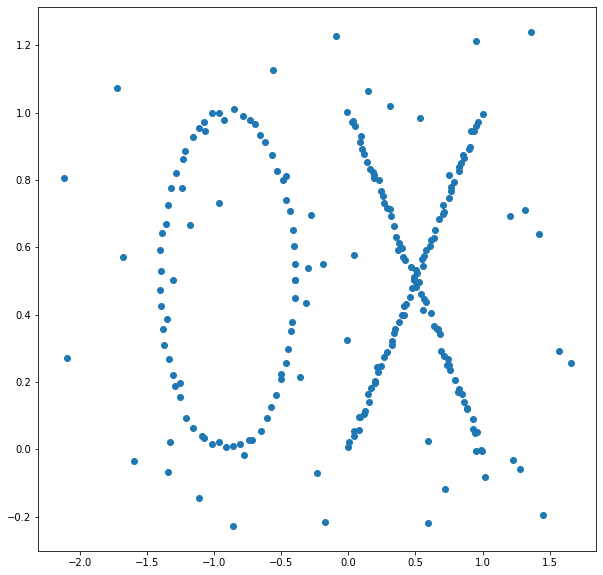

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1])
#ax.scatter(C[:, 0], C[:, 1])
fig.show()

## Compute the dynamic cut with the pacBayesian algorithm and plot the results

In [6]:
model = DendrogramCut(k_max=230, method='average').fit(dist)
k = model.pac_bayesian_cut()
print(k)
model.dendrogram_plot(k=k)

1


c:\Users\allem\Desktop\IACV-Project\src\pacBayesianDendogramCut.py:163: RuntimeWarning: invalid value encountered in long_scalars
  colorscale = dict((i, z[i] / (k - 1)) for i in range(self.n_data))


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [20.0, 20.0, 35.0, 35.0],
  [5.0, 5.0, 27.5, 27.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [70.0, 70.0, 85.0, 85.0],
  [50.0, 50.0, 77.5, 77.5],
  [105.0, 105.0, 115.0, 115.0],
  [110.0, 110.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [140.0, 140.0, 155.0, 155.0],
  [147.5, 147.5, 165.0, 165.0],
  [117.5, 117.5, 156.25, 156.25],
  [95.0, 95.0, 136.875, 136.875],
  [175.0, 175.0, 185.0, 185.0],
  [180.0, 180.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [212.5, 212.5, 235.0, 235.0],
  [187.5, 187.5, 223.75, 223.75],
  [255.0, 255.0, 265.0, 265.0],
  [260.0, 260.0, 275.0, 275.0],
  [245.0, 245.0, 267.5, 267.5],
  [285.0, 285.0, 295.0, 295.0],
  [256.25, 256.25, 290.0, 290.0],
  [205.625, 205.625, 273.125, 273.125],
  [115.9375, 115.9375, 239.375, 239.375],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [177.65625, 177.65625, 312.5, 312.5],
  [63.75, 63.75, 245.07812

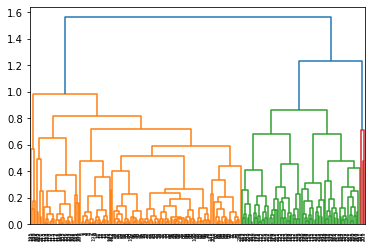

In [7]:
from scipy.cluster.hierarchy import dendrogram


dendrogram(model.linkage)

In [8]:
model.linkage

array([[1.20000000e+02, 1.79000000e+02, 1.28448746e-03, 2.00000000e+00],
       [1.12000000e+02, 1.13000000e+02, 3.21911449e-03, 2.00000000e+00],
       [6.20000000e+01, 6.10000000e+01, 5.68247604e-03, 2.00000000e+00],
       [1.10000000e+01, 1.20000000e+01, 6.21038419e-03, 2.00000000e+00],
       [1.19000000e+02, 1.18000000e+02, 7.31208871e-03, 2.00000000e+00],
       [4.20000000e+01, 4.10000000e+01, 8.23117394e-03, 2.00000000e+00],
       [5.00000000e+00, 6.00000000e+00, 8.35990552e-03, 2.00000000e+00],
       [7.20000000e+01, 7.10000000e+01, 9.09504090e-03, 2.00000000e+00],
       [9.90000000e+01, 9.80000000e+01, 9.77579344e-03, 2.00000000e+00],
       [8.90000000e+01, 8.80000000e+01, 9.77709244e-03, 2.00000000e+00],
       [1.05000000e+02, 1.04000000e+02, 1.03916801e-02, 2.00000000e+00],
       [4.90000000e+01, 4.80000000e+01, 1.04633739e-02, 2.00000000e+00],
       [7.00000000e+00, 1.98000000e+02, 1.08063084e-02, 2.00000000e+00],
       [5.10000000e+01, 5.20000000e+01, 1.10809458e